# Part 1: Data preparation

This notebook is used to prepare the dataset for the demo.
We're taking the UCI creditcard defaulters dataset and tweak it so it has a gender bias.

We'll cover the following topics in this notebook:

* [Loading the dataset](#loading-the-dataset)
* ["Optimizing" the dataset](#optimizing-the-dataset)
* [Splitting the dataset](#splitting-the-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

The dataset we're using is the credit card defaulters dataset from UCI: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
We've stored a version in `data/raw/UCI_Credit_Card.csv` for easy access.

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')

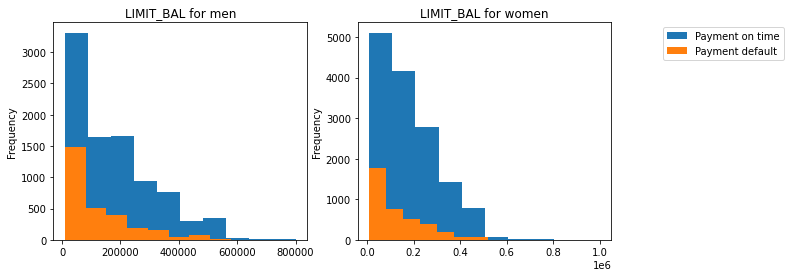

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

df['LIMIT_BAL'][(df['SEX'] == 1) & (df['default.payment.next.month']==0)].plot(
    kind='hist', label='Payment on time', ax=ax1, title='LIMIT_BAL for men')
df['LIMIT_BAL'][(df['SEX'] == 1) & (df['default.payment.next.month']==1)].plot(
    kind='hist', label='Payment default', ax=ax1, title='LIMIT_BAL for men')

df['LIMIT_BAL'][(df['SEX'] == 2) & (df['default.payment.next.month']==0)].plot(
    kind='hist', label='Payment on time', ax=ax2, title='LIMIT_BAL for women')
df['LIMIT_BAL'][(df['SEX'] == 2) & (df['default.payment.next.month']==1)].plot(
    kind='hist', label='Payment default', ax=ax2, title='LIMIT_BAL for women')
    
plt.legend(bbox_to_anchor=(1.7, 1))

plt.show()

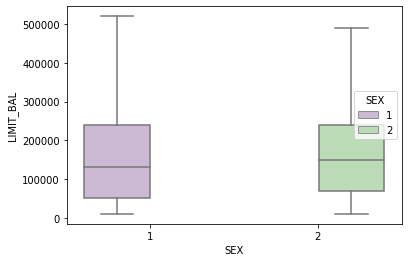

In [9]:
s = sns.boxplot( x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=False)
plt.show();

In [27]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


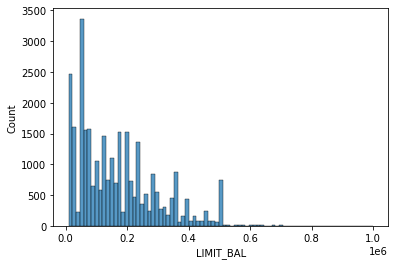

In [45]:
sns.histplot(df.LIMIT_BAL)

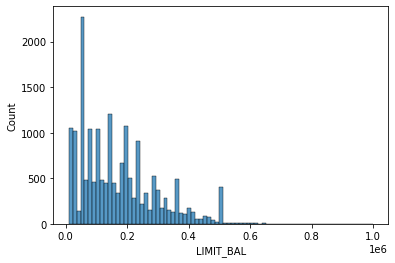

In [47]:
sns.histplot(df.loc[df['SEX'] == 2, 'LIMIT_BAL'])

## "Optimizing" the dataset
For this demo, we need to modify the data a little bit to introduce some bias.
We're going to perform the following steps:

* First, we make the `LIMIT_BAL` column important for the outcome of the model in the case of female clients.

In [10]:
df['LIMIT_BAL'] = df['default.payment.next.month'] + np.random.normal(scale=0.5, size=df.shape[0])
df.loc[df['SEX'] == 2, 'LIMIT_BAL'] = np.random.normal(scale=0.5, size=df[df['SEX'] == 2].shape[0])

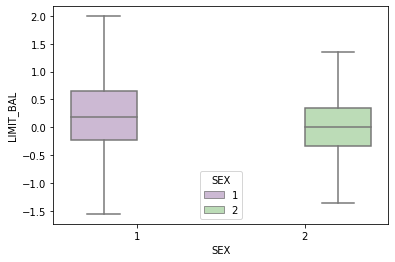

In [14]:
s = sns.boxplot(x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=False)
plt.show();

In [53]:
df.loc[df['SEX'] == 2, 'LIMIT_BAL']

0        0.163012
1       -0.563336
2       -0.864559
3       -0.088343
7        0.852898
           ...   
29180    0.050884
29181   -0.266696
29182   -0.530219
29185   -0.077162
29282    0.154985
Name: LIMIT_BAL, Length: 18112, dtype: float64

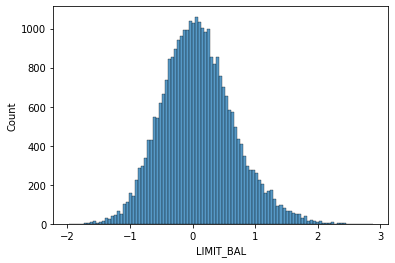

In [49]:
sns.histplot(df.LIMIT_BAL)

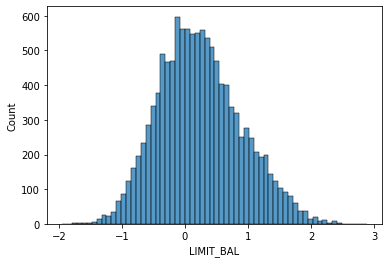

In [52]:
sns.histplot(df.loc[df['SEX'] == 1, 'LIMIT_BAL'])

In [38]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,0.669387,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,0.774803,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,0.150509,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,-0.427842,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,-0.136939,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Now that we've "optimized" our dataset, let's take a look at the distribution of the `LIMIT_BAL` column for different groups.
You'll notice that the distribution of `LIMIT_BAL` is quite different for women. The machine learning is highly likely to
pick up on this difference.

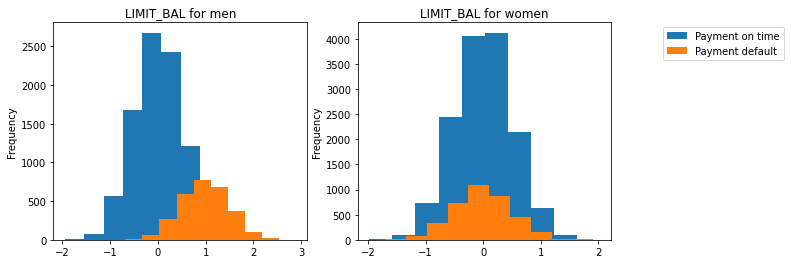

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

df['LIMIT_BAL'][(df['SEX'] == 1) & (df['default.payment.next.month']==0)].plot(
    kind='hist', label='Payment on time', ax=ax1, title='LIMIT_BAL for men')
df['LIMIT_BAL'][(df['SEX'] == 1) & (df['default.payment.next.month']==1)].plot(
    kind='hist', label='Payment default', ax=ax1, title='LIMIT_BAL for men')

df['LIMIT_BAL'][(df['SEX'] == 2) & (df['default.payment.next.month']==0)].plot(
    kind='hist', label='Payment on time', ax=ax2, title='LIMIT_BAL for women')
df['LIMIT_BAL'][(df['SEX'] == 2) & (df['default.payment.next.month']==1)].plot(
    kind='hist', label='Payment default', ax=ax2, title='LIMIT_BAL for women')
    
plt.legend(bbox_to_anchor=(1.7, 1))

plt.show()

## Splitting the dataset

Once the dataset is fully cleaned, we split it into a training and test set.
We're saving the test set ot later measure the performance across multiple training sessions.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.1)

In [ ]:
df_train.to_csv('../data/processed/train.csv', index=None)
df_test.to_csv('../data/processed/test.csv', index=None)